# Introduction to Machine Learning with Julia

---
Julia was originally released in 2012 by Alan Edelman, Stefan Karpinski, Jeff Bezanson, and Viral Shah. 
Its popularity has been increasing exponentially in the last few years and its speed and community have been key.  
Furthermore, and taking the words of Ben Lauwens in its book [*Think Julia*](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_why_julia) the reasons for picking up julia are:  
* Julia is developed as a high-performance programming language.
* Julia uses multiple dispatch, which allows the programmer to choose from different programming patterns adapted to the application.
* Julia is a dynamically typed language that can easily be used interactively.
* Julia has a nice high-level syntax that is easy to learn.
* Julia is an optionally typed programming language whose (user-defined) data types make the code clearer and more robust.
* Julia has an extended standard library and numerous third-party packages are available.

Being you a R user, Python user or even not profecient with any machine learning related language, this guide is aimed to give you an hand understanding julia and how it is applied to ML.

## Getting Started

So first of all, the packages we are using today for classification task is [MLJ package](https://github.com/alan-turing-institute/MLJ.jl).  
DataFrames and CSV are for data handling and StatsPlots for visualization.

In [1]:
using MLJ
using CSV
using DataFrames
using StatsPlots
using Random

First of all we need to load the data we are testing, we will be using the data from [UCI repository](https://archive.ics.uci.edu/ml/datasets.php), namely the [Breast Cancer Coimbra Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra).  
We will import and make a initial analysis of the data present, by viewing scitypes selected, the schema and take a glimpse at the first four records of the data.

## Data Import and visualizations

Lets download the data and put the path to it in the ```CSV.read(<path>)```

In [2]:
data = CSV.read("C:/Users/joaof/OneDrive/Pessoal/HEADS/03. LEARN/dataR2.csv");
@show schema(data).scitypes
@show schema(data)
first(data, 4)

(schema(data)).scitypes = (Count, Continuous, Count, Continuous, Continuous, Continuous, Continuous, Continuous, Continuous, Count)
schema(data) = MLJScientificTypes.Schema{(:Age, :BMI, :Glucose, :Insulin, :HOMA, :Leptin, :Adiponectin, :Resistin, Symbol("MCP.1"), :Classification),Tuple{Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64},Tuple{Count,Continuous,Count,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Count},116}()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,48,23.5,70,2.707,0.467409,8.8071,9.7024,7.99585,417.114
2,83,20.6905,92,3.115,0.706897,8.8438,5.42929,4.06405,468.786
3,82,23.1247,91,4.498,1.00965,17.9393,22.432,9.27715,554.697
4,68,21.3675,77,3.226,0.612725,9.8827,7.16956,12.766,928.22


Our purpose for today is to create models that can predict the **Classification** variable. Which is the classification of the patient.   
1 is for healthy controls  
2 is for real patient  

In order to predict it, we will use the remaining variables (like Age, BMI, etc)

So we will check how the variable is distributed in the dataset to see if it is balanced

In [3]:
by(data,:Classification,nrow)

,Classification,nrow
,Int64,Int64
1,1,52
2,2,64


Fairly balanced, so lets look at some descriptive statistics of the whole dataset

In [4]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Age,57.3017,24,56.0,89,,,Int64
2,BMI,27.5821,18.37,27.6624,38.5788,,,Float64
3,Glucose,97.7931,60,92.0,201,,,Int64
4,Insulin,10.0121,2.432,5.9245,58.46,,,Float64
5,HOMA,2.69499,0.467409,1.38094,25.0503,,,Float64
6,Leptin,26.6151,4.311,20.271,90.28,,,Float64
7,Adiponectin,10.1809,1.65602,8.35269,38.04,,,Float64
8,Resistin,14.726,3.21,10.8277,82.1,,,Float64
9,MCP.1,534.647,45.843,471.322,1698.44,,,Float64


No missings and all numeric data. Thats cool!  

For MLJ package, scitypes are core. So we will coerce them to continuous and OrderedFactor to apply the most known models down the line.

In [5]:
coerce!(data, :Classification=>OrderedFactor);
coerce!(data, Count=>Continuous);

Now we are ready to make some visualizations and get a better understanding of the data at hand

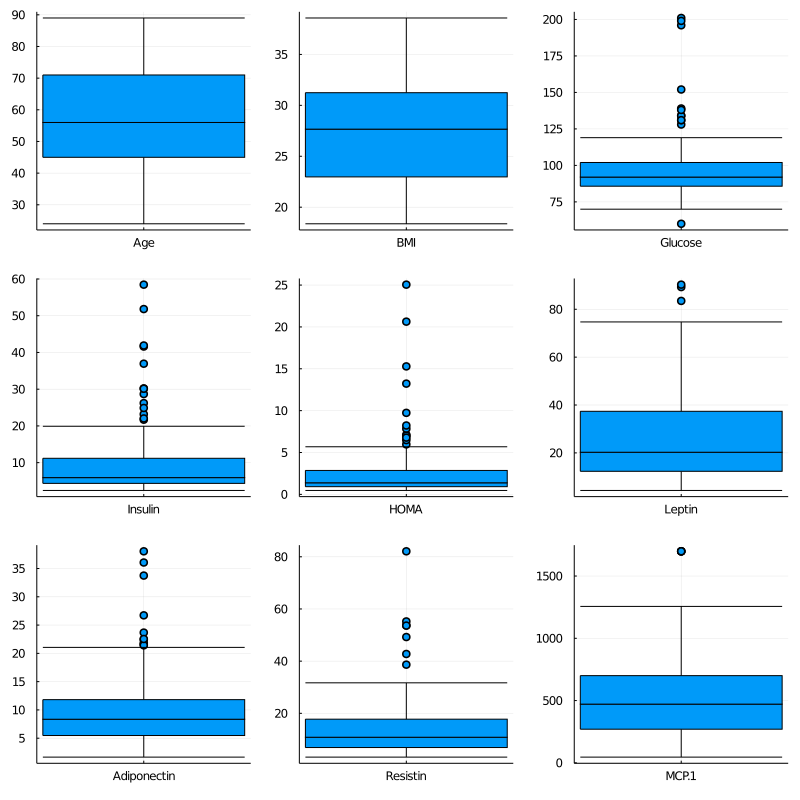

In [6]:
data_m=convert(Matrix,data)
p=boxplot(layout=9)
p=boxplot(layout=9,size=(800,800))
for i in 1:9
    boxplot!([names(data)[i]],data_m[:,i], subplot = i,label=nothing )
end
display(p)

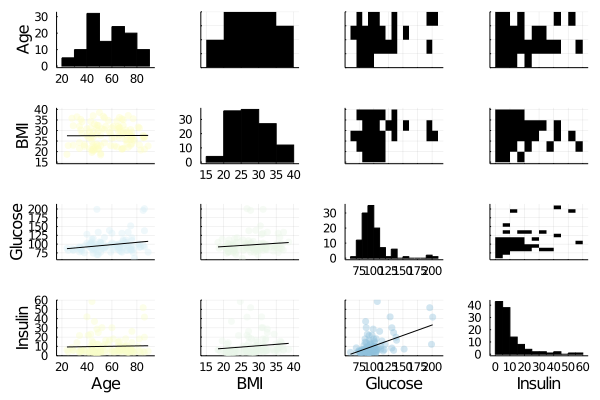

In [7]:
@df data corrplot(cols(1:4))

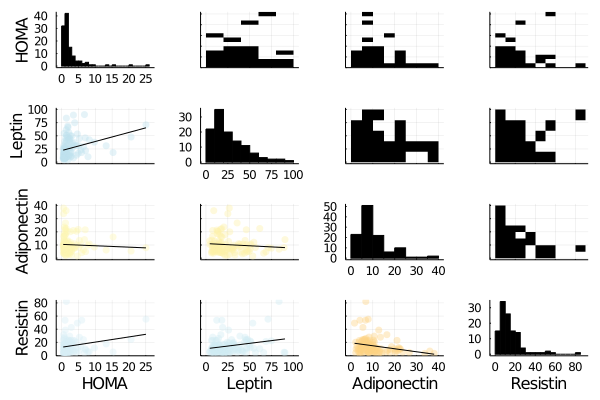

In [8]:
@df data corrplot(cols(5:8))

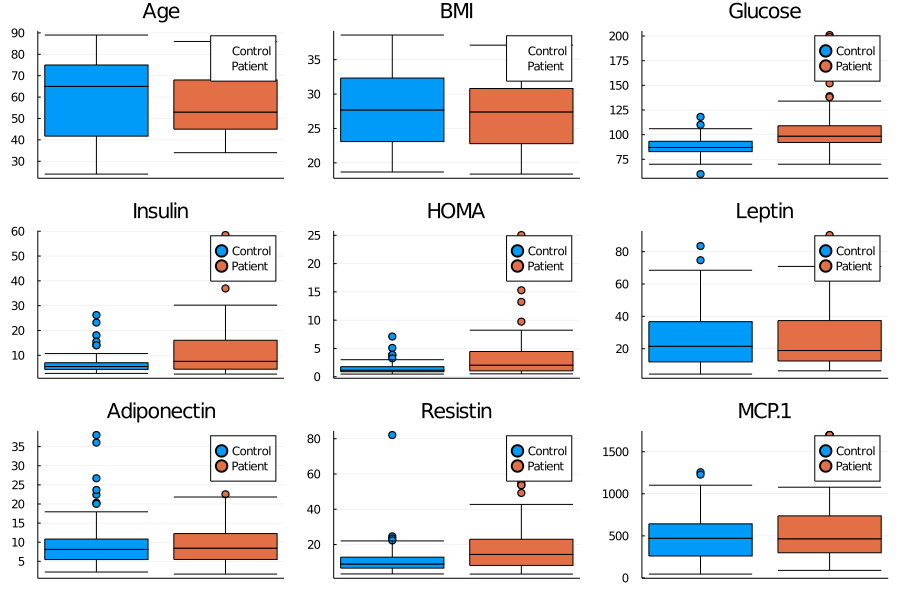

In [9]:
p=boxplot(layout=9,size=(900,600))
for i in 1:9
    boxplot!(data_m[:,10],data_m[:,i] ,  group=data_m[:,10], subplot = i,title =names(data)[i] ,xaxis=nothing,label=["Control" "Patient"] )
end
display(p)

We can check with the graphs above that it really seems to be a difference in the classifiers regarding the target variable **Classification**. We can now make our models.

## Creating Models

First we unpack the data into target (**y**) and predictors (**X**)  
For getting more information on julia functions, we can type ```??unpack``` to get more info

In [10]:
y,X= unpack(data,==(:Classification),colname -> true);

MLJ provides the models function that has information on all the models that we can use. We can filter it by the data scitypes that we have (remember the coercing earlier)

In [11]:
models(matching(X, y)) #searching by input and target scitypes

43-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_na

We can also filter by name

In [12]:
models("forest")#searching models by name

4-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = RandomForestClassifier, package_name = DecisionTree, ... )
 (name = RandomForestClassifier, package_name = ScikitLearn, ... )
 (name = RandomForestRegressor, package_name = DecisionTree, ... )
 (name = RandomForestRegressor, package_name = ScikitLearn, ... )

Lets try and use a few models to get a better grasp of the package and existent models. Lets try linear, non-linear and some more advanced models.
But first, lets create a train dataset and a test dataset and a dict to collect all the test results. ```rng``` is the seed for the randomization

In [13]:
train, test = partition(eachindex(y), 0.8,shuffle=true,rng=42)
test_results=Dict();

For all the models, the workflow will be similar:
1. load the model with ```@load```
2. create the machine according to our data (This does not train the model, only instantiates it)
3. Fit and evaluate the performance of the model with the training dataset.  In this case we will use a 10-fold cross-validation, collect two measures (accuracy and confusion matrix)
4. We then use the trained model to predict the unseen data (test set) and collect the accuracy in the test set in the previously created dict

First we can use the Linear Discriminant Analysis. 

In [173]:
# Linear Models
##LDA
Random.seed!(1234);
model_lda=@load LDA
mach_lda=machine(model_lda,X,y)

eval_lda=evaluate!(mach_lda, rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[accuracy,confusion_matrix],operation=predict_mode)
eval_lda.measurement[2]

ŷ = predict_mode(mach_lda, rows=test)
test_results["acc_lda"] = accuracy(ŷ, y[test])

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\Ov46j\src\resampling.jl:343
Evaluating over 10 folds: 100%[=========================] Time: 0:00:00


0.6086956521739131

For non-linear, we will try a decision tree and the Knn

In [174]:
# Non Linear Models
## Decision tree
Random.seed!(1234);
model_tree = @load DecisionTreeClassifier
mach_tree = machine(model_tree, X, y)

eval_tree=evaluate!(mach_tree,rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[accuracy,confusion_matrix],operation=predict_mode)
eval_tree.measurement[2]

ŷ = predict_mode(mach_tree, rows=test)
test_results["acc_tree"] = accuracy(ŷ, y[test])

## KNN
Random.seed!(1234);
model_knn= @load KNNClassifier
mach_knn = machine(model_knn, X, y)

eval_knn=evaluate!(mach_knn, rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[accuracy,confusion_matrix],operation=predict_mode)
eval_knn.measurement[2]

ŷ = predict_mode(mach_knn, rows=test)
test_results["acc_knn"] =accuracy(ŷ, y[test])

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\Ov46j\src\resampling.jl:343
Evaluating over 10 folds: 100%[=========================] Time: 0:00:00
┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\Ov46j\src\resampling.jl:343
Evaluating over 10 folds: 100%[=========================] Time: 0:00:00


0.4347826086956522

Finnaly we will try Support Vector Machines and Random Forest (an ensemble of trees)

In [175]:
# Other Models
# Svm
model_svm= @load SVMLinearClassifier()
model_svm.random_state=1234 #you can easily modify models (here we add the random state)
mach_svm = machine(model_svm, X, y)

eval_svm=evaluate!(mach_svm,rows=train, resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[accuracy,confusion_matrix],operation=predict)
eval_svm.measurement[2]

ŷ = predict(mach_svm, rows=test)
test_results["acc_svm"] = accuracy(ŷ, y[test])

## Random Forest
Random.seed!(1234);
model_rf= @load RandomForestClassifier pkg="DecisionTree"
mach_rf = machine(model_rf, X, y)

eval_rf=evaluate!(mach_rf, rows=train,resampling=CV(nfolds=10,shuffle=true,rng=42), measures=[accuracy,confusion_matrix],operation=predict_mode)
eval_rf.measurement[2]

ŷ = predict_mode(mach_rf, rows=test)
test_results["acc_rf"] = accuracy(ŷ, y[test])

┌ Warning: New model type being bound to `SVMLinearClassifier45` to avoid conflict with an existing name. 
└ @ MLJModels C:\Users\joaof\.julia\packages\MLJModels\JR7LJ\src\loading.jl:78
┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase C:\Users\joaof\.julia\packages\MLJBase\Ov46j\src\resampling.jl:343
C:\Users\joaof\.julia\conda\3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Evaluating over 10 folds:  10%[==>                      ]  ETA: 0:00:00C:\Users\joaof\.julia\conda\3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Evaluating over 10 folds:  20%[=====>                   ]  ETA: 0:00:00C:\Users\joaof\.julia\conda\3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear

0.4782608695652174

## Summing up

Now we collect all the accuracy calculated in the cross-validation and create a visualization presenting the average and standard deviations of the 10 results for each model. 

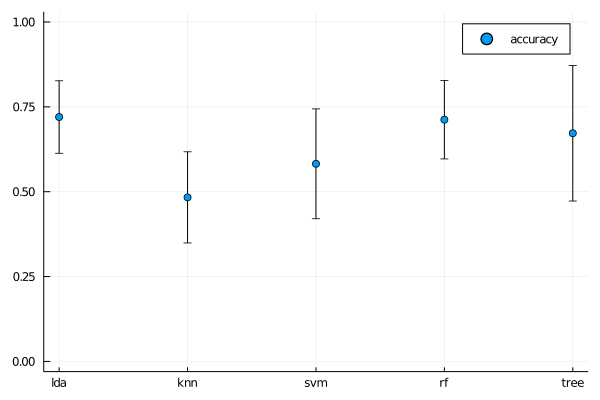

In [184]:
results= [eval_lda.measurement[1], eval_knn.measurement[1],eval_svm.measurement[1],eval_rf.measurement[1],eval_tree.measurement[1]];
errors=[std(eval_lda.per_fold[1]),std(eval_knn.per_fold[1]),std(eval_svm.per_fold[1]),std(eval_rf.per_fold[1]),std(eval_tree.per_fold[1])]
scatter(["lda", "knn", "svm", "rf", "tree"],results,yerror=errors,ylims=[0,1],label="accuracy")

We can also check the accuracy of the test set

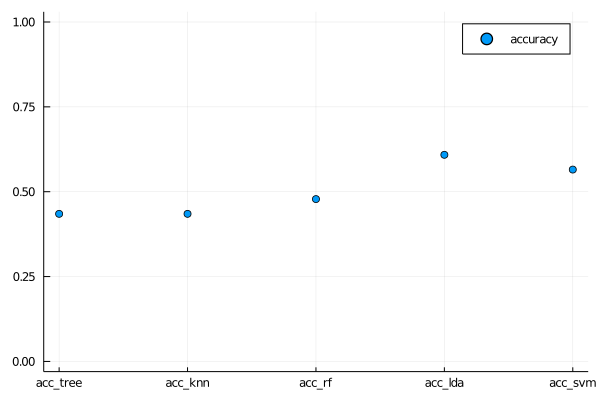

In [185]:
scatter(Array(string.(keys(test_results))),Array(float.(values(test_results))),ylims=[0,1],label="accuracy")

The best model for the test set seemed to bethe decision tree. We can inspect the model further with these functions.

In [186]:
#checking fitting parameters for possible best model
@show report(mach_lda)
fitted_params(mach_lda)

report(mach_lda) = (classes = CategoricalValue{Int64,UInt32}[1, 2], out_dim = 1, class_means = [57.6 56.72727272727273; 29.112218096500005 26.750180776136368; 89.625 106.11363636363636; 7.7612749999999995 13.733636363636366; 1.7593088583249998 4.084969695545454; 30.216369999999994 25.150545454545455; 9.973112125 10.274550113636366; 12.2713675 16.835623863636364; 475.99039999999997 603.7657954545452], mean = [57.14285714285714, 27.874960452500005, 98.26190476190476, 10.889654761904763, 2.9775121540119045, 27.562842857142854, 10.131008214285716, 14.662168452380953, 542.9203690476189], class_weights = [40.0, 44.0], Sw = [22742.327272727274 35.10802900763652 8120.363636363641 660.7970363636362 831.836750828745 2214.8599654545465 -2181.3369546363647 1261.0683463636362 20461.027945454538; 35.10802900763652 2059.191832803826 1033.4767217268184 1020.8651435523861 288.00855541590767 4160.855400371769 -961.676128607518 1555.6123288832832 39660.398937608494; 8120.363636363641 1033.4767217268184 3

(projected_class_means = [57.6 56.72727272727273; 29.112218096500005 26.750180776136368; … ; 12.2713675 16.835623863636364; 475.99039999999997 603.7657954545452],
 projection_matrix = [-0.0010364048580610956; -0.011242348297508649; … ; 0.005172695852110662; 0.00011373076735120189],)

## Conclusion

This was a simple exercice about how to use julia and some more popular packages to create simple classification models.  
We did not tuned any of the models nor used any kind of hyperparameter tuning. Nevertheless, we already could find some models robust enough to make accurate predictions.
Julia is a strong and robust language growing and very interesting to look into. If you want to know more check their [website](https://julialang.org/) or their [github](https://github.com/JuliaLang/julia)